# Analysing Data and Visualising Results using Python
---
---
## Loading Data from a File

Firstly, we need to reload our list of words that we were using in the notebook `2-collecting-and-preparing.ipynb` that we saved in a file.

I'm going to gloss over exactly how this code works because we probably don't have time to cover the `open()` function and `for` loops in this workshop.

All you need to understand is that we open and read the file, then put the contents back into a list of tokens. The **list is identical to the list we were working with in the previous notebook** `2-collecting-and-preparing.ipynb`.

---
#### Going Further: Opening and Reading Text Files
If you would like to understand the following code better, try this guide [Reading and Writing Files in Python](https://realpython.com/read-write-files-python/#opening-and-closing-a-file-in-python).

---

In [30]:
from pathlib import Path
text_file = Path('data', 'CLEAN-6130-8.txt')
words = []

# Open the text file and append all the words to a list of words
with open(text_file) as file:
    for word in file.read().split():
        words.append(word)

words[0:20]

['the',
 'iliad',
 'of',
 'homer',
 'translated',
 'by',
 'alexander',
 'pope',
 'with',
 'notes',
 'by',
 'the',
 'rev',
 'theodore',
 'alois',
 'buckley',
 'ma',
 'fsa',
 'and',
 'flaxman']

---
---
## Step 4: Analysing your Data with Frequency Analysis
Well done on making it this far! Let's take a moment to remember our research question:

> What are the top 10 words used in Homer's Iliad in English translation?

In order to answer this question we need to _count_ the number of _each unique word_ in the text. Then we can see which are the most popular, or frequent, 10 words. This metric is called a **frequency distribution**. 

### English Stopwords
Before we start, we need to take a moment to think about what sort of words we are actually interested in counting. 

We are not interested in common words in English that carry little meaning, such as 'the', 'a' and 'its'. These are called **stopwords**. There is no definitive list of stopwords, but a commonly-used list is provided by the Natural Language Toolkit (NLTK).

Let's do this in 4 steps:

1. We start by downloading the the NLTK list of all stopwords:

In [62]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/mary/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

2. Then we import the list of stopwords we just downloaded, and get just the English stopwords.

In [63]:
from nltk.corpus import stopwords

english_stops = stopwords.words('english')

sorted_english_stops = sorted(english_stops)
sorted_english_stops[0:20]

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been']

3. Before using the stopwords, we will also remove all the punctuation so that it matches the text we already cleaned:

In [32]:
import string

# Make a table that 'translates' all punctuation to None (i.e. empty) 
table = str.maketrans('', '', string.punctuation)

english_stops_nopunct = {stopword.translate(table) for stopword in english_stops}
english_stops_nopunct

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 'arent',
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 'couldnt',
 'd',
 'did',
 'didn',
 'didnt',
 'do',
 'does',
 'doesn',
 'doesnt',
 'doing',
 'don',
 'dont',
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 'hadnt',
 'has',
 'hasn',
 'hasnt',
 'have',
 'haven',
 'havent',
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 'isnt',
 'it',
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 'mightnt',
 'more',
 'most',
 'mustn',
 'mustnt',
 'my',
 'myself',
 'needn',
 'neednt',
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 's',
 'same',
 '

4. Finally, we filter out all the English stopwords from the tokens:

In [33]:
words_nostops = [word for word in words if word not in english_stops_nopunct]
words_nostops[:20]

['iliad',
 'homer',
 'translated',
 'alexander',
 'pope',
 'notes',
 'rev',
 'theodore',
 'alois',
 'buckley',
 'fsa',
 'flaxman',
 'designs',
 'contents',
 'introduction',
 'pope',
 'preface',
 'iliad',
 'homer',
 'book']

**Beautiful!** 😃

### Creating a Frequency Distribution
At last, we are ready to create a frequency distribution. We will use another NLTK facility called `FreqDist` to count the frequency of each unique word in the text.

First, we create a frequency distribution:

In [43]:
from nltk.probability import FreqDist
freqdist = FreqDist(words_nostops)

Here are the top 10 most frequent words (the numbers are the absolute word count):

In [44]:
freqdist.most_common(10)

[('thy', 943),
 ('thus', 624),
 ('shall', 509),
 ('great', 475),
 ('hector', 457),
 ('arms', 447),
 ('jove', 429),
 ('achilles', 418),
 ('war', 370),
 ('oer', 364)]

> Rather amazingly, that is it! We have now answered our research question and can submit our thesis. Congratulations! 🎉

---
---
## Step 5: Presenting the Results of Your Analysis Visually
But wait, we need a pretty graph for the examiners! Let's display our results as a simple line plot using the library `matplotlib`.

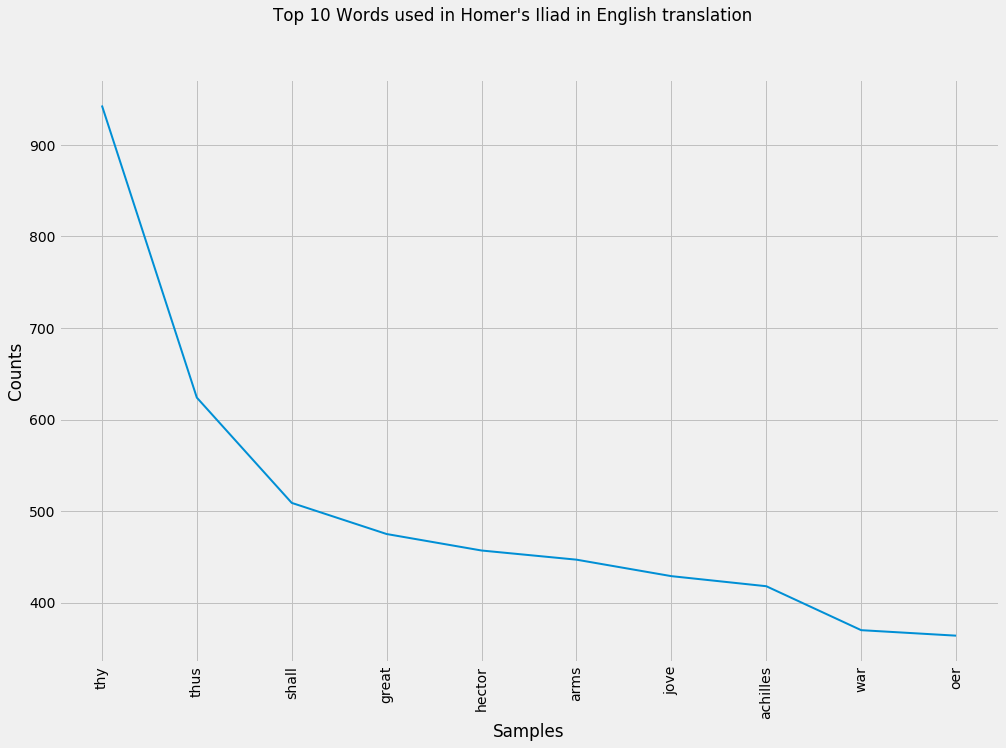

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
plt.style.use('fivethirtyeight')
plt.suptitle("Top 10 Words used in Homer's Iliad in English translation")

FreqDist.plot(freqdist, 10)

By changing the code you can explore different data and ways of displaying your data. There are also lots of other graphs that `matplotlib` can create, and alternative plotting libraries to use instead, but these are beyond the scope of our workshop.

### Review and Reflection
Now that you have seen the data and graph we have generated, no doubt you can see many ways we should improve. What immediately jumps out at you?

The process of text-mining a corpus (or individual text) is an iterative process. As you clean and explore the data, you will go back over your workflow again and again -- from the collection stage, through to cleaning, analysis and presentation.

**Fortunately, as you have done all your text-mining in code, you know exactly what you did and can rerun and modify the process.** 😀

---
### Going Further: Libraries Libraries Libraries

By now, you will be getting the idea that much of what you want to do in Python involves importing libraries to help you. Remember, libraries are _just code that someone else has written_.

As reminder, here are some of the useful libraries we have used or mentioned in this workshop:
* [Requests](http://docs.python-requests.org/en/master/) - HTTP (web) requests library
* [Natural Language Tool Kit (NLTK)](http://www.nltk.org/) - natural language analysis library
* [Matplotlib](https://matplotlib.org/) - 2D plotting library

---


---
---
## Summary

Finally, we have achieved text-mining nirvana! Let's recap. 🙌

We have: 

* Loaded our clean text data from a file into a list
* Removed English stopwords from the list of tokens
* Created a frequency distribution and found the 10 most frequent words
* Visualised the frequency distribution in a line plot

🎉🎉🎉

---
---
## What's Next?
You will get the most out of this workshop if you can follow up on the learning over the next few days before you forget it all! This is particularly important when learning to code. The abstract concepts need to be reinforced little and often.

Optional next steps:

* Work through a book chapter on Python basics: Kazil, J. & Jarmul, K., 2016. _Data Wrangling with Python_, chapter 2 'Python Basics'.
* Install Python using Anaconda on your computer: [Installing Anaconda on Windows](https://www.datacamp.com/community/tutorials/installing-anaconda-windows) [Installing Anaconda on Mac](https://www.datacamp.com/community/tutorials/installing-anaconda-mac-os-x).
* Work through this series of [Programming Historian tutorials](https://programminghistorian.org/en/lessons/working-with-text-files) to get some more practice with basic text files and basic text-mining techniques.

